# Generating plots for `project00` phase1

### 1. Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### 2. Read the data

In [2]:
# change the working directory
os.chdir('/Users/akhil/code/csci627-project00-akhilpandey95/data/')

# read the csv into a dataframe
data = pd.read_csv('phase_one_z1835018.csv')

### 3. Preprocessing the dataframe

#### 3.1 Drop unnecessary columns

In [3]:
# drop the '_id' column
data = data.drop(['_id'], axis=1)

# display the head of the data
data.head()

,building,day,didicode,distancefromhome,in,modeoftransport,out,reason,rhr,screentime,weather,wind
0,Student Recreation Center,02-03-2019,no,1.2,19:43,walk,21:09,"running, sauna",101,00:11,38,9
1,Founders Memorial Library,02-04-2019,no,1.7,13:11,walk + bus,13:51,"lunch, trying out einstein bagels",71,00:24,42,15
2,Psy-Math Building,02-04-2019,yes,1.8,14:03,walk,15:33,"PM 254 - Data lab, research",66,01:10,40,17
3,Psy-Math Building,02-04-2019,no,1.8,16:56,walk,18:24,"CSCI 627, lecture",68,00:03,33,12
4,Student Recreation Center,02-04-2019,no,1.2,20:20,walk,22:16,"rowing, sauna",112,00:10,29,21


#### 3.2 Functions for extracting information from the dataframe

In [4]:
# function for getting the total value from a column
perform_map = lambda x, y: sum(list(map(x, y)))

# function for extracting time information from
# the screentime column and return the time in hours
get_minutes = lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1])

# function for identifying the number of hours between
# two given timestamps
def get_time(time_string_a, time_string_b):
    # set the time format
    FMT = '%H:%M'
    
    # create the timedelta calculating the difference between the
    # two time strings
    tdelta = datetime.strptime(time_string_b, FMT) - datetime.strptime(time_string_a, FMT)
    
    # if timedelta gives us a negative result then we have to
    # take then account
    if tdelta.days < 0:
        # create the time delta
        tdelta = timedelta(days=0, seconds=tdelta.seconds, microseconds=tdelta.microseconds)
        
        # separate the hours and minutes and create a string
        total_seconds = tdelta.total_seconds()
        h = totsec//3600
        m = (totsec%3600) // 60
        
        # return the value in hours
        return round(h + m/60, 2)
    else:
        # separate the hours and minutes and create a string
        secs = tdelta.total_seconds()
        h_2 = secs//3600
        m_2 = (secs%3600) // 60
        
        # return the value in hours
        return round(h_2 + m_2/60, 2)

#### 3.3 Print out essential numerical stats from the column

In [5]:
# get the information about total distance
print("Total distance:", perform_map(float, data['distancefromhome']))

# get the total screen time in hours
print("Total screentime for the week:", perform_map(get_minutes, data['screentime']))

# get the average screen time
print("Average screentime per day:", perform_map(get_minutes, data['screentime'])/7)

Total distance: 26.4
Total screentime for the week: 959
Average screentime per day: 137.0


### 4. Generate plots

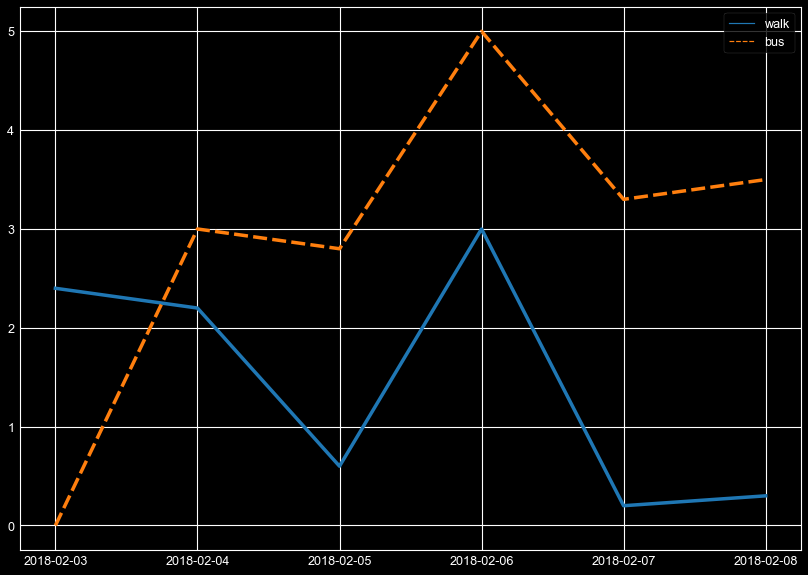

In [6]:
# set the background to black
plt.style.use('dark_background')

# set the values
values = [[2.4, 0.0], 
          [2.2, 3.0], 
          [0.6, 2.8], 
          [3.0, 5.0], 
          [0.2, 3.3], 
          [0.3, 3.5]]

# set the date range for the date values
dates = pd.date_range("2 3 2018", periods=6, freq="D")
data_1 = pd.DataFrame(values, dates, columns=["walk", "bus"])

# set the size of the plot
plt.gcf().set_size_inches(14, 10)

# draw the lineplot
sns.lineplot(data=data_1, palette="tab10", hue='modeoftransport', linewidth=3.5)
# plt.savefig('plot_phase1_p_1.png', dpi=300)
plt.show()

In [7]:
# set the values
data_2 = data.assign(values = [get_time(data['in'][x], data['out'][x]) for x in range(len(data))])

# group the dates with the total screentime hours
data_2 = pd.DataFrame(data_2.groupby(['day'])['values'].sum())

plt.tick_params(axis='x', which='major', width=150, labelsize=15, rotation=45)

# set the size of the plot
plt.gcf().set_size_inches(22, 16)
sns.barplot(x=data_2.index, y=data_2['values'], data=data_2)
plt.show()

NameError: name 'totsec' is not defined

In [ ]:
# set the background to black
plt.style.use('dark_background')

# prepare the data
data_3 = data.assign(values = [get_time(data['in'][x], data['out'][x]) for x in range(len(data))])

# set the y limit
plt.ylim(0, max(list(map(get_minutes, data_3['screentime']))))

# set the size of the plot
plt.gcf().set_size_inches(16, 14)

# adjust the ticks and label params
plt.tick_params(axis='x', which='major', width=150, labelsize=15, rotation=45)

# create the barplot
sns.barplot(x='day', y=list(map(get_minutes, data_3['screentime'])), hue='didicode', data=data_3)
plt.show()